# **Super Bowl TV Viewership**

# **Data Engineering**

--------------------------------
## **Project Purpose** 
-------------------------------

The purpose of this project is to understand the popularity of National Football League (NFL) of the United States. This project explores the arguably the biggest night in football, the Super Bowl, using data engineering. The Super Bowl typically occurs on a Sunday night in the first weekend of February. Over the years, the Super Bowl has evolved becoming more sophisticated in strategy and data analytics. 

--------------------------------
## **Nielsen Ratings Data** 
-------------------------------

Nielsen collects and analyzes audience data across various media platforms. Nielsen is a company in the United States that started measuring radio ratings in the 1930s. Later in the 1950s, it started measuring TV ratings using metering technology. Nielsen takes a sample group to represent homes in the United States to reflect the entire population. January 2024, Nielsen increased its sample group from 25,000 households to 41,000 households (100,000 people). Nielsen uses electronic meters to monitor TV viewership, which sends viewership data back to Nielsen. This data is then used to inform advertisering clients, which commerical blocks.  

For local TV ratings, 2 million paper diaries are sent out to local viewers in February, May, July, and November. The diaries are later collected and analyzed. Conversely, for streaming systems audio files on streamed shows that provide viewership data based on the audio data from the shows watched.

For example, if a show like Bridgerton has 5.0 household rating/10 share. This means that 5.0 or 5% of all households with a TV watched the show. 10 share means that 10% of households with TVs are watching at anytime (Forbes, December 2015).

NEW YORK – February 13, 2024 – An estimated 123.7 million viewers tuned in for Super Bowl LVIII on Sunday, February 11, according to average audience estimates from Nielsen. The broadcast averaged 120.3 million viewers on CBS alone, making it the largest audience for a single-network telecast to date. An additional 2.3 million viewers watched the Spanish-language broadcast on Univision, and 1.2 million tuned in to watch the kid-friendly broadcast on Nickelodeon and Nick-at-Nite.

The overtime thriller between the San Francisco 49ers and the Kansas City Chiefs drew a combined average household rating of 43.5, and combined household share of 83. In total, year-over-year viewership was up 7.4% from 2023. 

The broadcast of Super Bowl LVIII ran from approximately 6:40 PM ET to 10:45 PM ET on CBS, Univision, Nickelodeon and Nick-at-Nite. Audience estimates are also inclusive of digital (DTVR) and Out-Of-Home (OOH) viewing, and viewing via MVPD/vMVPDs, Paramount+, and digital properties of CBS Sports, Univision and the NFL, including NFL+ (Nielsen, February 2024).

--------------------------------
## **Prediction** 
-------------------------------

The teams with the most TV Viewership is the most popular team in the NFL.

# **Webscraping TV Viewership**

In [1]:
!pip install selenium

In [2]:
# Import Splinter and BeautifulSoup and other relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from splinter import Browser
from bs4 import BeautifulSoup

In [3]:
# Initialize Chrome browser with automatic chromedriver management
service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()

# **Step 1: Visit the Website**
1. Use automated browsing to visit the Nieslen Rating Website. Inspect the page to identify which elements to scrape.

Hint To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools.

In [4]:
# Pass the service to the browser instead of driver_executable_path
browser = Browser('chrome', options=options, service=service, headless=False)

In [5]:
#Visit the Nielsen Ratin Website
url = 'https://www.nielsen.com/news-center/2024/super-bowl-lviii-draws-123-7-million-average-viewers-largest-tv-audience-on-record/'
browser.visit(url)

# **Step 2: Scrape the Website**

2. Create a Beautiful Soup object and use it to extract text elements form the website.

In [6]:
# Create a Beautiful Soup object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [143]:
#print(soup)

In [7]:
# Extract all rows of data
table = soup.find_all('tr')
#rows = table.find_all('tr')

In [145]:
#print(table)

In [146]:
#print(rows)

# **Step 3: Store the Data**
Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

Super Bowl: the identification number of the Super Bowl Number. 
Example: LVIII is the Greek Number for 58, so Super Bowl LVIII is the 58th Super Bowl. Super Bowl LVIII happened in Feb. 11, 2024.

Network(s): the United States Televsion Networks
Example: ESPN OR NBC.

Total Viewers P2+: the total number of viewers in the millions. 
Example: approximately 20,000,000-130,000,000.

HHLD (Household) Rating: the rating or the percentage of Nielsen's panel that watched a specific program. The Nielsen Ratings
collect and calculate data uses meters and people meters. Meters are attached to TVs, which records the viewership data and sent to a data center. People meters is a devices that can be attached to a remore or worn as clip/wristband.
Example: 43.2 means 43.2% of panel watched the program. 

Date: the date of the Super Bowl broadcast.
Example: Feb.11,2024 is the date when the Superbowl occured and was broadcasted live.

In [8]:
##Ask for help with code for the for loop

# Initialize empty lists to store data
years, networks, viewers, ratings, dates = [], [], [], [], []

# Iterate through each row in the table
for row in soup.find_all('tr')[1:]:  # Skipping the header row
    cells = row.find_all('td') #columns
    if len(cells) > 0:
        years.append(cells[0].get_text(strip=True))
        networks.append(cells[1].get_text(strip=True))
        viewers.append(cells[2].get_text(strip=True))
        ratings.append(cells[3].get_text(strip=True))
        dates.append(cells[4].get_text(strip=True))

# Create a DataFrame from the scraped data
data = pd.DataFrame({
    'Super_Bowl': years, #renamed columns
    'Network(s)': networks,
    'Total_Viewers': viewers,
    'HHLD_Rating': ratings,
    'Date': dates
})

# Save the DataFrame to a CSV file
data.to_csv('super_bowl_audience_data.csv', index=False)

print("Data has been successfully scraped and saved to 'super_bowl_audience_data.csv'") #created a csv file


Data has been successfully scraped and saved to 'super_bowl_audience_data.csv'


In [9]:
#Read the csv file
data = pd.read_csv('super_bowl_audience_data.csv')

In [150]:
#View Data
data.head()

,Super_Bowl,Network(s),Total_Viewers,HHLD_Rating,Date
0,LVIII,"CBS, Univision,Nickelodeon, Nick-at-Nite","123,714,000",43.5,"Feb. 11, 2024"
1,LVII,FOXFOX Deportes,"115,096,000",40.7,"Feb. 12, 2023"
2,LVI,NBCTelemundo,"101,470,000",37.9,"Feb. 13, 2022"
3,LV,CBSESPN Deportes,"95,877,000",38.4,"Feb. 7, 2021"
4,LIV,FOXFOX Deportes,"102,086,000",42.0,"Feb. 2, 2020"


# **Step 4: Prepare Data for Analysis**

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate datetime, int, or float data types.

Hint You can use the Pandas astype and to_datetime methods to accomplish this task.

In [10]:
# Examine data type of each column
data.dtypes

Super_Bowl        object
Network(s)        object
Total_Viewers     object
HHLD_Rating      float64
Date              object
dtype: object

In [31]:
len(data)

59

# **Step 5: Analyze the Data**
Analyze your dataset by using Pandas functions to answer the following questions:

1. How many Super Bowls?
2. How many Total Viewers of data exist in the scraped dataset?
3. How many HHLD Ratings are there?
4. What is the least viewed and most viewed Super Bowls?
   Find the minimum and maximum Super Bowl of all Super Bowls watched.
   Plot the results as a bar chart.
5. What is the average viewship of the Super Bowl?
6. Which months have the lowest and the highest watched Super Bowl? To answer this question:
   Find the average the daily watched Super Bowl of all the months.
   Plot the results as a bar chart.

In [11]:
#Counts for Super Bowl
data.value_counts('Date')

Date
Jan. 15, 1967    2
Jan. 26, 1992    1
Jan. 17, 1971    1
Jan. 18, 1976    1
Jan. 20, 1980    1
Jan. 20, 1985    1
Jan. 21, 1979    1
Jan. 22, 1984    1
Jan. 22, 1989    1
Jan. 24, 1982    1
Jan. 25, 1981    1
Jan. 25, 1987    1
Jan. 25, 1998    1
Jan. 26, 1986    1
Feb. 1, 2004     1
Jan. 16, 1972    1
Jan. 26, 2003    1
Jan. 27, 1991    1
Jan. 28, 1990    1
Jan. 28, 1996    1
Jan. 28, 2001    1
Jan. 29, 1995    1
Jan. 30, 1983    1
Jan. 30, 1994    1
Jan. 30, 2000    1
Jan. 31, 1988    1
Jan. 31, 1993    1
Jan. 31, 1999    1
Jan. 26, 1997    1
Jan. 15, 1978    1
Feb. 1, 2009     1
Jan. 14, 1973    1
Feb. 1, 2015     1
Feb. 11, 2024    1
Feb. 12, 2023    1
Feb. 13, 2022    1
Feb. 2, 2014     1
Feb. 2, 2020     1
Feb. 3, 2002     1
Feb. 3, 2008     1
Feb. 3, 2013     1
Feb. 3, 2019     1
Feb. 4, 2007     1
Feb. 4, 2018     1
Feb. 5, 2006     1
Feb. 5, 2012     1
Feb. 5, 2017     1
Feb. 6, 2005     1
Feb. 6, 2011     1
Feb. 7, 2010     1
Feb. 7, 2016     1
Feb. 7, 2021     1
Jan. 11

**Data Engineering Method 1**: Webscraped Super Bowl TV Viewership table from Nielsen Ratings. Used Beautiful Soup. For educational purposes.

# **Data Visualization**

<Axes: title={'center': 'Super Bowl Household Rating 1967-2024'}, xlabel='Date', ylabel='HHLD_Rating'>

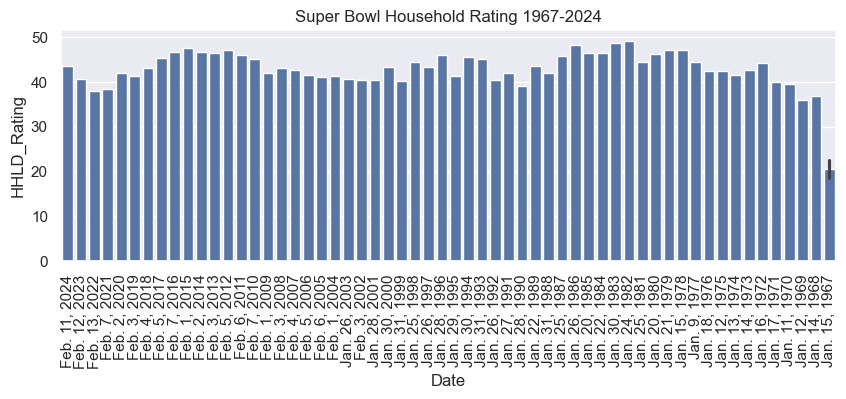

In [57]:
# Household ratings bar plot. Shows the frequency of the household ratings by date in the graph. 

plt.figure(figsize=(10,3))
plt.title("Super Bowl Household Rating 1967-2024")
plt.xticks(rotation=90)
sns.barplot(x=data["Date"], y=data["HHLD_Rating"])

**Bar Plot Observations**: Is also known as the count plot. This graph is showing the frequency of the household ratings by date. Or how often a particular count, the household in this case, is shown in the graph.For instance Jan. 24,1982 has almost a rating of 50.

Network(s)
CBS                                         18
NBC                                         17
ABC                                          7
FOX                                          6
FOXFOX Deportes                              4
CBSESPN Deportes                             3
NBCUniverso                                  2
CBS, Univision,Nickelodeon, Nick-at-Nite     1
NBCTelemundo                                 1
Name: count, dtype: int64

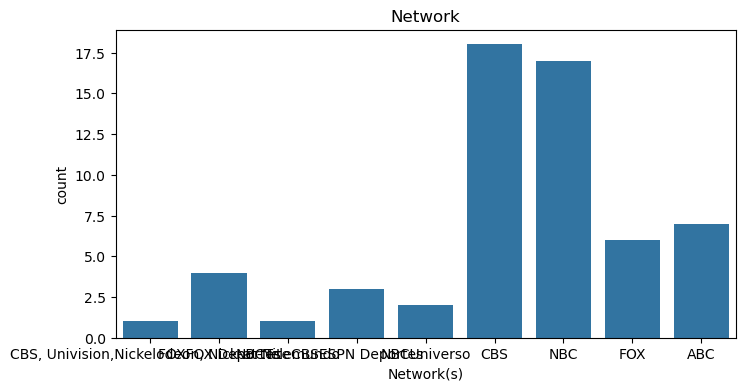

In [12]:
#Bar plot of the Networks

plt.figure(figsize=(8,4))
plt.title("Network")
sns.countplot(x=data['Network(s)'])
data['Network(s)'].value_counts()

**Count Plot Observations**: Is also known as the count plot. This graph is showing the frequency of the Networks. Or how often a particular count, network(s) in this case, is shown in the graph.

In [70]:
#Install bubbly for bubble chart
!pip install bubbly

In [3]:
#Import libraries

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff



import warnings
warnings.filterwarnings('ignore')

In [16]:
#Average Superbowl rating

print('Average Super Bowl Rating = ', np.mean(data['HHLD_Rating']))

Average Super Bowl Rating =  42.49322033898305


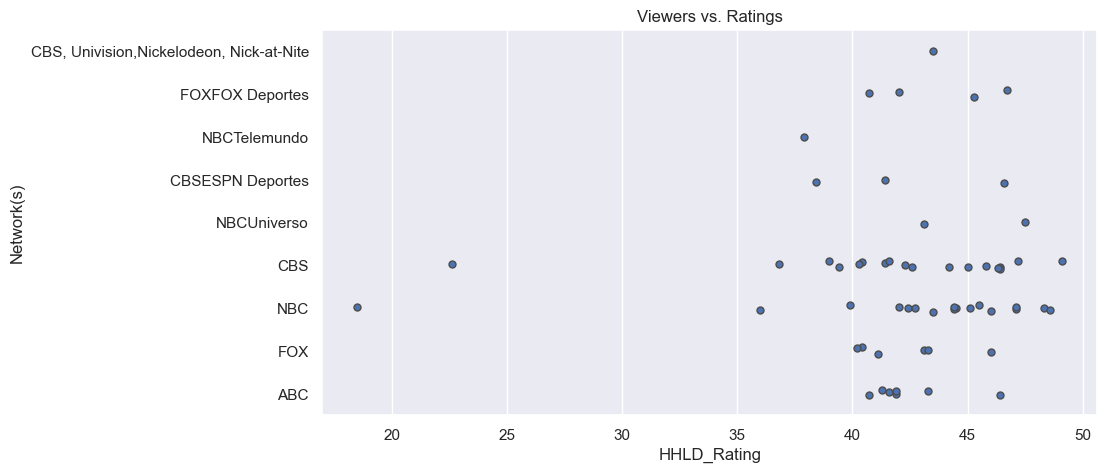

In [30]:
#Strip Plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
p = sns.stripplot(x="HHLD_Rating", y="Network(s)", data=data, jitter=True, linewidth=1)
title = ax.set_title('Viewers vs. Ratings')

**Strip Plot Observation**: Allows for individual data points to be seen without the ovrelapping of points. Characteristically, 
it is similiar to a scatterplot.

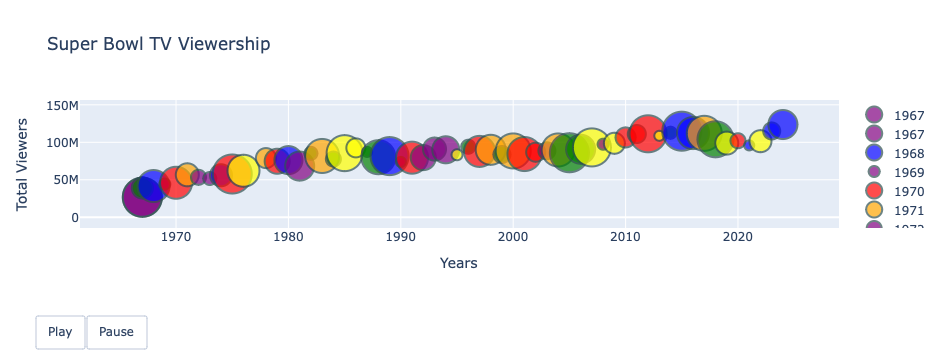

In [2]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Sample DataFrame
bubble_chart_data = {
    'Total_Viewers': ['123,714,000', '115,096,000', '101,470,000', '95,877,000', '102,086,000', '98,950,000',
                      '104,016,000', '111,973,000', '112,336,000', '114,810,000', '112,752,000', '108,693,000',
                      '111,346,000', '111,041,000', '106,476,000', '98,732,000', '97,448,000', '93,184,000',
                      '90,745,000', '86,072,000', '89,795,000', '88,637,000', '86,801,000', '84,335,000',
                      '88,465,000', '83,720,000', '90,000,000', '87,870,000', '94,080,000', '83,420,000',
                      '90,000,000', '90,990,000', '79,590,000', '79,510,000', '73,852,000', '81,590,000',
                      '80,140,000', '87,190,000', '92,570,000', '85,530,000', '77,620,000', '81,770,000',
                      '85,240,000', '68,290,000', '76,240,000', '74,740,000', '78,940,000', '62,050,000',
                      '57,710,000', '56,050,000', '51,700,000', '53,320,000', '56,640,000', '46,040,000',
                      '44,270,000', '41,660,000', '39,120,000', '26,750,000', '24,430,000'],
    
    'Years': ['2024', '2023', '2022', '2021', '2020', '2019', 
             '2018', '2017', '2016', '2015', '2014', '2013', 
             '2012', '2011', '2010', '2009', '2008', '2007', 
             '2006', '2005', '2004', '2003', '2002', '2001', 
             '2000', '1999', '1998', '1997', '1996', '1995', 
             '1994', '1993', '1992', '1991', '1990', '1989', 
             '1988', '1987', '1986', '1985', '1984', '1983', 
             '1982', '1981', '1980', '1979', '1978', '1976', 
             '1975', '1974', '1973', '1972', '1971', '1970', 
             '1969', '1968', '1967', '1967']
}

# Ensure both lists have the same length
bubble_chart_data['Total_Viewers'] = bubble_chart_data['Total_Viewers'][:len(bubble_chart_data['Years'])]

# Create DataFrame
bubble_chart_df = pd.DataFrame(bubble_chart_data)

# Convert 'Total_Viewers' to numeric by removing commas
bubble_chart_df['Total_Viewers'] = pd.to_numeric(bubble_chart_df['Total_Viewers'].str.replace(',', ''), errors='coerce')

# Convert 'Years' to numeric to ensure proper sorting
bubble_chart_df['Years'] = pd.to_numeric(bubble_chart_df['Years'], errors='coerce')

# Sort the DataFrame by 'Years' to ensure chronological order
bubble_chart_df = bubble_chart_df.sort_values('Years')

# Create size and color columns
bubble_chart_df['Size'] = np.random.randint(10, 40, size=len(bubble_chart_df))  # Random sizes between 10 and 40
bubble_chart_df['Color'] = np.random.choice(['red', 'blue', 'green', 'orange', 'purple', 'yellow'], size=len(bubble_chart_df))  # Random colors

# Create the animated bubble chart using plotly.graph_objects
fig = go.Figure()

# Loop through each year to create individual traces for the animation
for year in bubble_chart_df['Years']:
    year_data = bubble_chart_df[bubble_chart_df['Years'] == year]
    
    # Add scatter traces for different shapes and colors
    fig.add_trace(go.Scatter(
        x=year_data['Years'],
        y=year_data['Total_Viewers'],
        mode='markers',
        marker=dict(
            size=year_data['Size'],
            color=year_data['Color'],
            line=dict(width=2, color='DarkSlateGrey')
        ),
        name=str(year),
        hoverinfo='text',
        text=f"Year: {year}<br>Total Viewers: {year_data['Total_Viewers'].values[0]:,.0f}"
    ))

# Update layout
fig.update_layout(
    title='Super Bowl TV Viewership',
    xaxis_title='Years',
    yaxis_title='Total Viewers',
    xaxis=dict(type='linear'),  # Ensure linear x-axis for chronological order
    showlegend=True
)

# Create animation by setting frames
frames = [go.Frame(data=[go.Scatter(
    x=bubble_chart_df[bubble_chart_df['Years'] == year]['Years'],
    y=bubble_chart_df[bubble_chart_df['Years'] == year]['Total_Viewers'],
    mode='markers',
    marker=dict(
        size=bubble_chart_df[bubble_chart_df['Years'] == year]['Size'],
        color=bubble_chart_df[bubble_chart_df['Years'] == year]['Color'],
        line=dict(width=2, color='DarkSlateGrey')
    ),
    hoverinfo='text',
    text=f"Year: {year}<br>Total Viewers: {bubble_chart_df[bubble_chart_df['Years'] == year]['Total_Viewers'].values[0]:,.0f}"
)]) for year in bubble_chart_df['Years']]

# Add frames to the figure
fig.frames = frames

# Add play button for the animation
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'mode': 'immediate'}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate'}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Show the chart
fig.show()


**Bubble Chart Observations:** Shows the relationship between two variables. This particular bubble chart is show the 
relationship between Years and Total Viewers. For example, in 1967 there were 100 Million+ viewers.

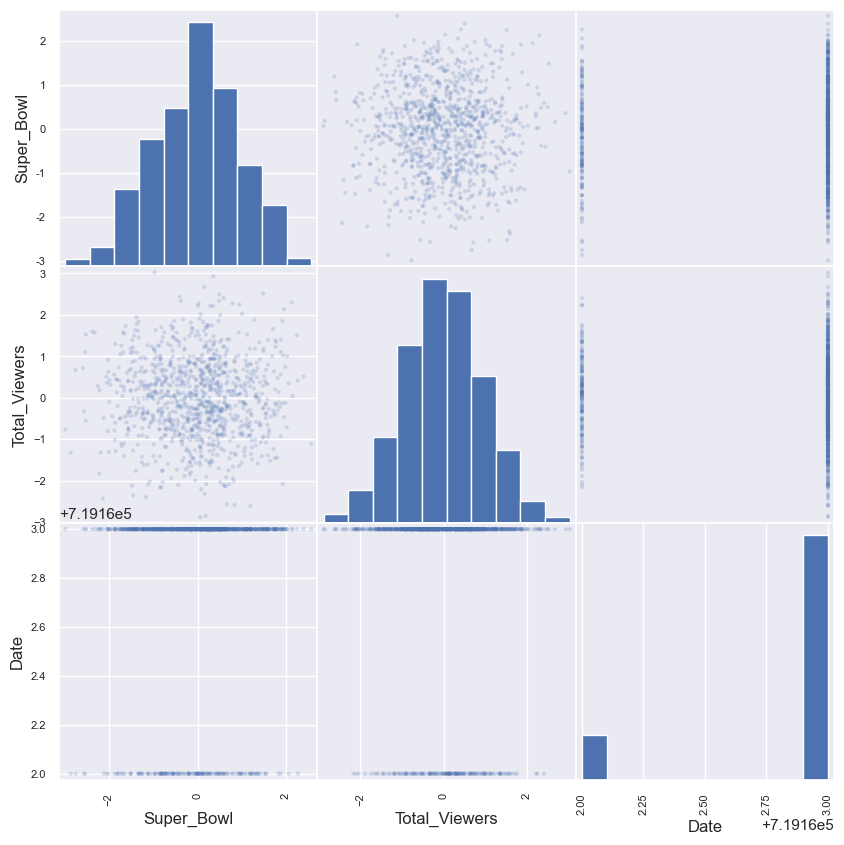

In [19]:
#Scatterplot Matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random DataFrame
df = pd.DataFrame(np.random.randn(1000, 4), columns=['Super_Bowl', 'Network(s)', 'Total_Viewers', 'Date'])

# For demonstration purposes, convert 'Date' column to datetime and then to numeric (timestamp)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

# Optionally, drop or encode categorical columns
df_numeric = df.drop(columns=['Network(s)'])  # Drop non-numeric column

# Plot the scatter matrix with numeric columns only
pd.plotting.scatter_matrix(df_numeric, alpha=0.2, figsize=(10, 10))

# Show plot
plt.show()

**Scatterplot Matrix Observations**:The scatterplot matrix (a.k.a pairplot) is a grid of scatter plots that shows relationshps between variables. When analyzing a scatterplot, we are looking for correlations and clusters/patterns. There is clustering for the following pair Super Bowl and Total Viewers. This indictates that there are subgroups like Super Bowls with similiar Total Viewers. While there is no correlation between Super Bowl and Date or Total Viewers and Date, which indidates that there is no relationship. 

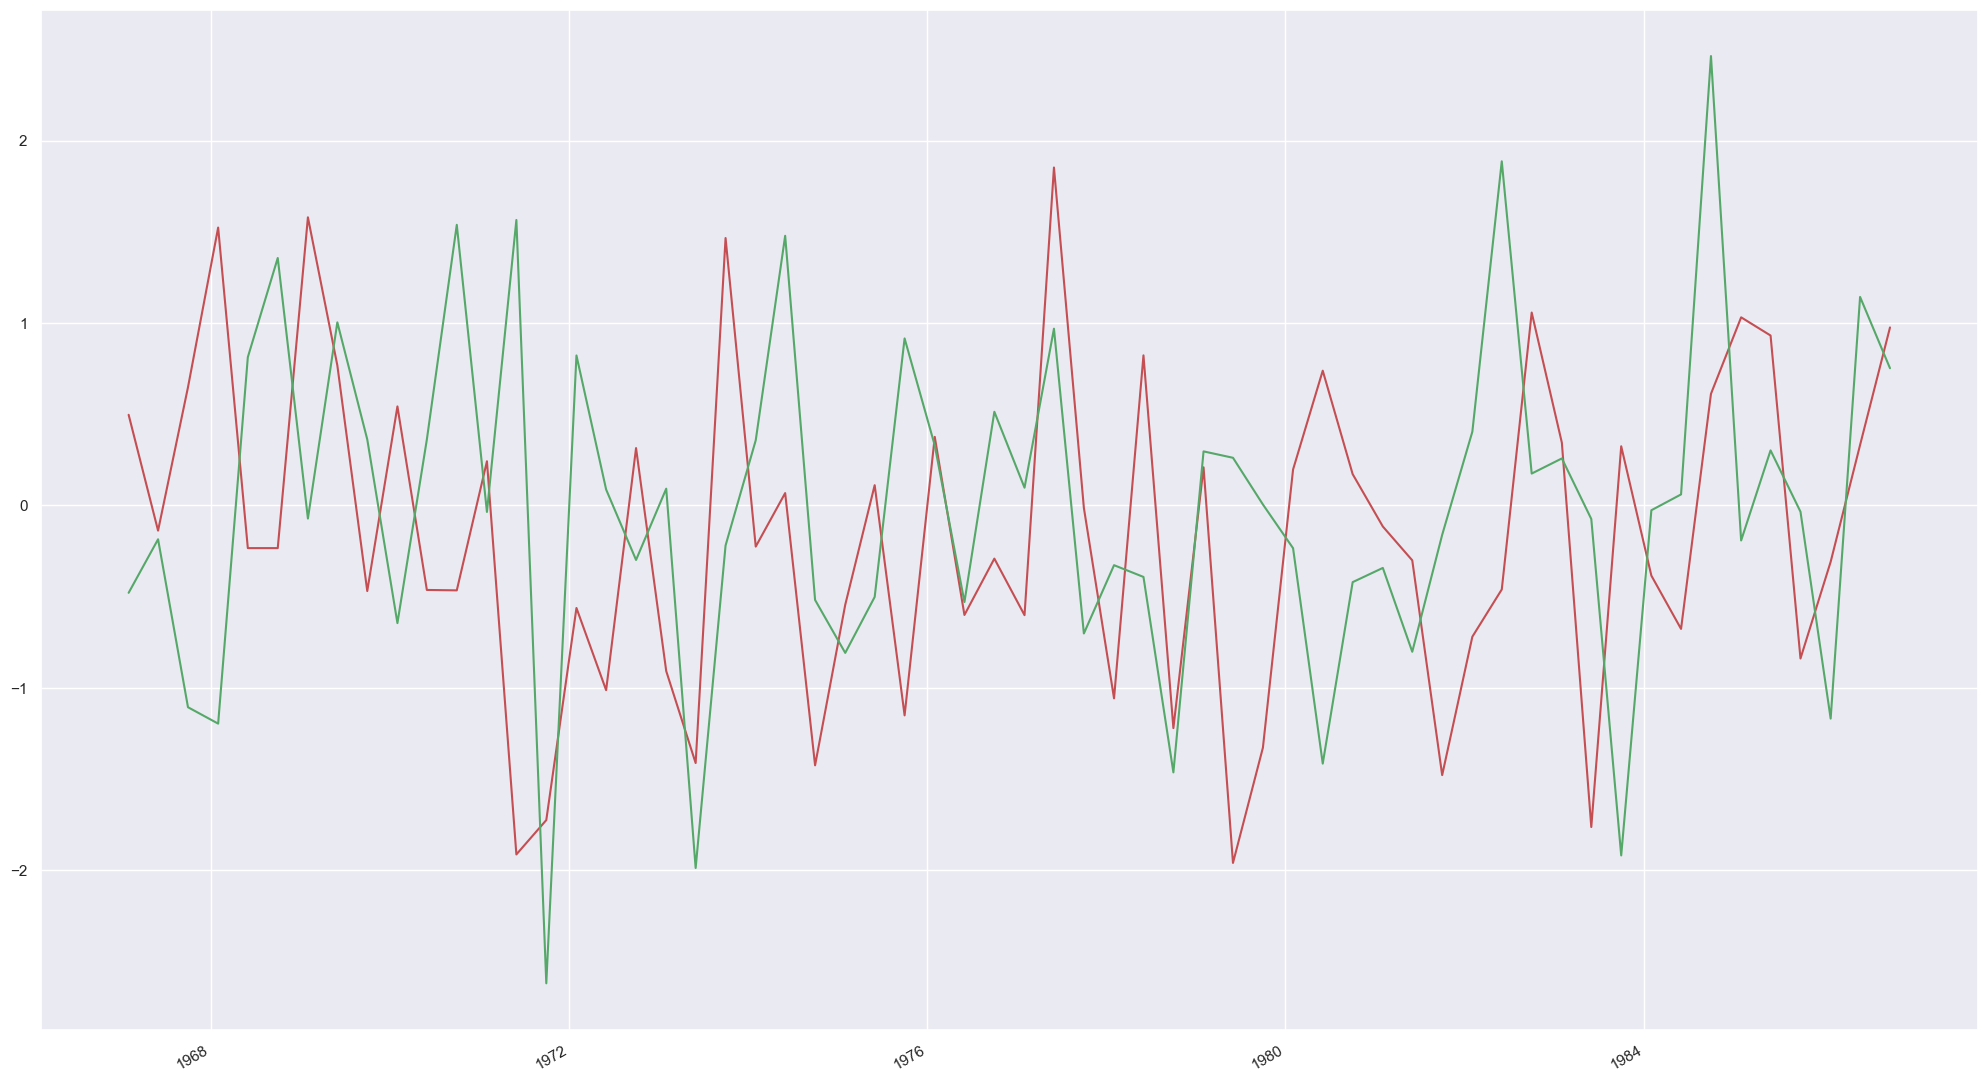

In [28]:
>>> np.random.seed(42)
>>> df = pd.DataFrame({'Total_Viewers': np.random.randn(60),
...                   'HHLD_Rating': np.random.randn(60)},
...                   index=pd.date_range("1/15/1967",
...                   freq='4MS', periods=60))
>>> with pd.plotting.plot_params.use("x_compat", True):
...     _ = df['Total_Viewers'].plot(color="r")
...     _ = df['HHLD_Rating'].plot(color="g")

**Plot Params**: Shows trends over time. The x-axis is time, and the y-axis is Total Viewers and HHLD Rating. Total Viewers is represented by red line while HHLD Rating is represented by a green line. The function np.random.seed(42) generates random numbers whenever you run the code. Total Viewers and HHLD Rating have arrays that select random numbers from the normal distribution. 4MS is every 4 months that equals 60 periods. There is some overlap between total viewers and hhld rating.

# **Average 2022 NFL National TV Ratings** #

According to Nielsen live-plus-same-day data, the NFL averaged 16.7 million viewers over the course of the regular season, and while those deliveries amounted to a 3% decline compared to the year-ago tally (17.1 million), the shrinkage was almost entirely a function of the shift of Thursday Night Football from linear TV to Amazon Prime Video’s streaming service. Exclude those 15 games from the calculus, and the NFL posted a tidy 4% gain, averaging nearly 18 million viewers since the season kicked off on Sept. 8. 

Leading the charge for the NFL were the broadcast networks, each of which notched year-over-year gains. NBC’s Sunday Night Football package averaged 19.9 million viewers, with streaming impressions accounting for nearly 6% (1.2 million) of the network’s overall deliveries. NBC’s overall NFL numbers marked a 3% increase versus last season’s 19.3 million viewers, giving SNF its strongest showing since the 2019-20 campaign.

NBC reaped the benefits of the most competitive NFL season in memory, as its 20 games were among the most hotly contested of 2022. Not only did an 8.9-point margin of victory mark an all-time low for NBC’s games—last season’s spread was a less compelling 12.8 points per game—but also, no fewer than 13 of NBC’s contests were settled by one score. Nail-biters keep fans tuned in, and the NFL served them up throughout the season; the league-wide average margin of victory of 9.7 points per game was the lowest since 1935. (Across the board, 155 NFL games this season were settled by a single score, up 24% versus 125. Blowouts were down 29%, with 73 games being settled by two touchdowns or more, down from 103 in 2021.)

That Fox managed to notch a six-year ratings high in the absence of its longtime lead broadcast battery of Joe Buck and Troy Aikman probably tells you all you need to know about the correlation between a network’s booth personnel and the final Nielsen ratings. At any rate, Fox’s NFC-heavy slate justified its dizzying ad rates, which averaged out to nearly $900,000 a throw across the back end of each Sunday afternoon doubleheader.

CBS took full advantage of its hybrid schedule, as six of its national windows featured must-see inter-conference matchups. The network reached a Sunday high-water mark with Week 2’s Bengals-Cowboys showdown, which averaged 27.5 million viewers in 81% of all markets. CBS’s coast-to-coast schedule featured just two all-AFC pairings (Bills-Chiefs, Chiefs-Bengals), and by taking on more NFC teams than ever before, the network got more play in many of the larger media markets. (Including the shared New York and Los Angeles markets, eight of the 10 largest DMAs are home to an NFC franchise.)

With more Cowboys, Bucs and Giants games on tap, CBS scored its most-watched NFL campaign in seven years, averaging 18.5 million viewers across its Sunday slate. Isolate the 10 “NFL on CBS” national windows, and the Tiffany network averaged 23.5 million viewers, up 9% from last season’s 21.6 million. Advertisers in the upfront who secured time in CBS’ late-afternoon NFL broadcasts forked over around $720,000 a pop, while the harder-to-come-by scatter units topped the $800,000 mark.(Sportico, Janurary 2023).

In [2]:
# Import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Read the csv file
data = pd.read_csv('/Users/talibahtimothy/Downloads/Average_2022­_NFL_National_TV_Ratings.csv')

# Display the first few rows to check if it loaded correctly
data.head()


,Team_ID,Team_Name,DMA_Ranking,Average_National_TV_Viewers,HH_Rating,Team_Record,Wins,Losses,Ties
0,1,Arizona Cardinals,11,13.8M,6.9,(4-13),4,13,0
1,2,Atlanta Falcons,7,6.8M,3.3,(7-10),7,10,0
2,3,Baltimore Ravens,28,14.5M,7.8,(10-7),10,7,0
3,4,Buffalo Bills,53,20.9M,9.7,(13-3),13,3,0
4,5,Carolina Panthers,22,6.8M,3.3,(7-10),7,10,0


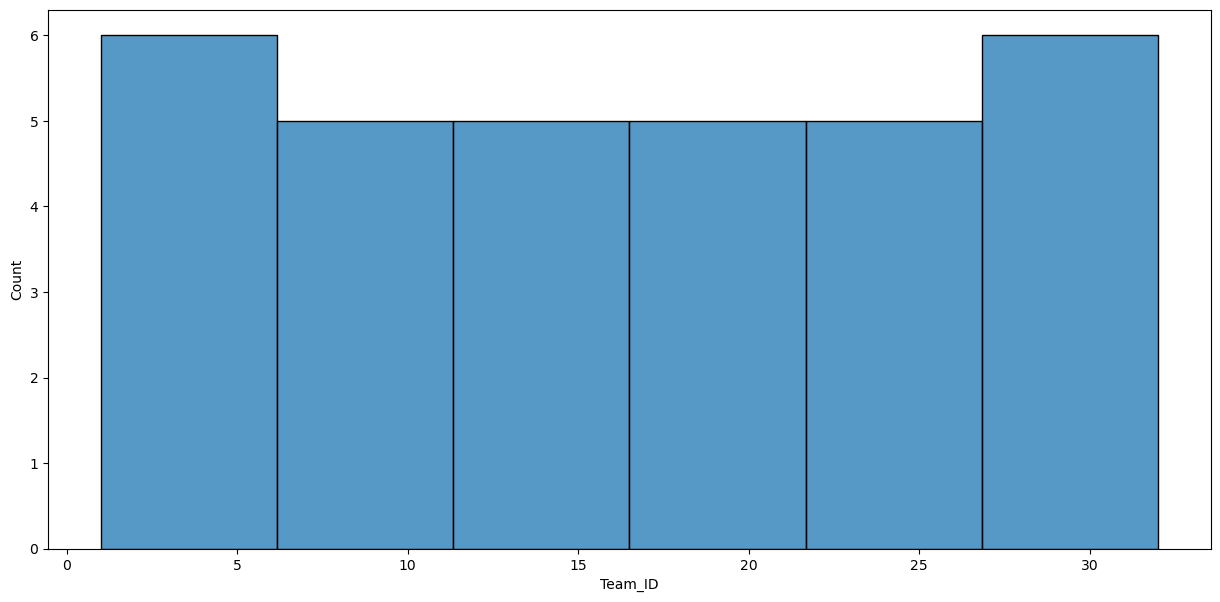

In [40]:
#Team ID Histogram
plt.figure(figsize=(15,7))
sns.histplot(x='Team_ID',data=data)
plt.show()

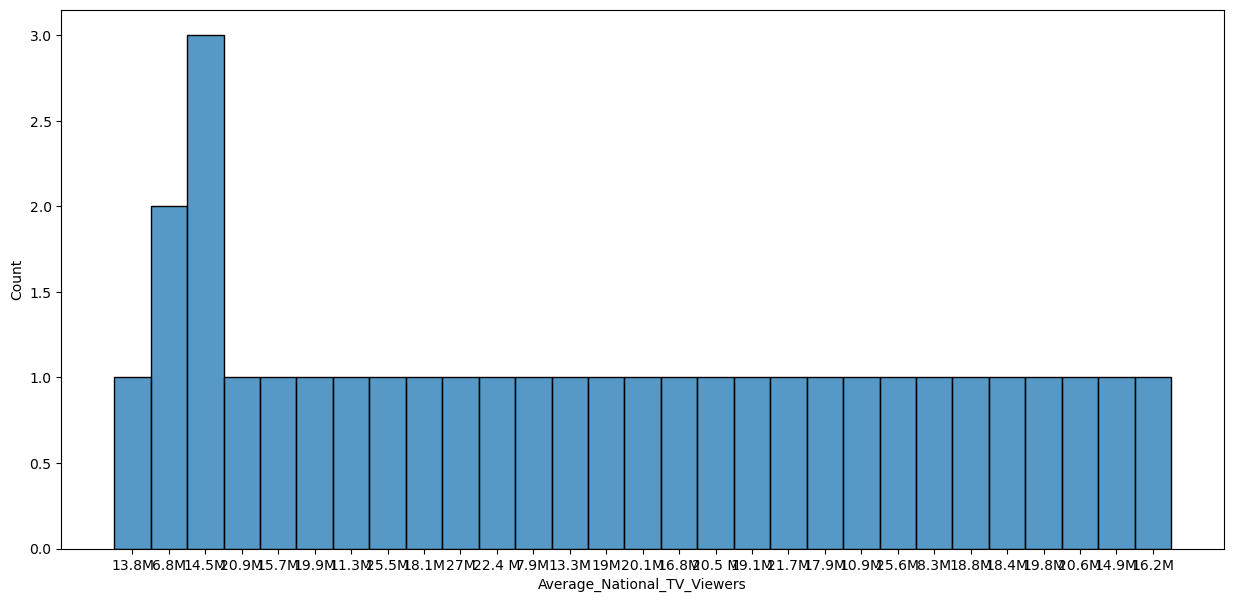

In [41]:
#Average National Viewers Histogram
plt.figure(figsize=(15,7))
sns.histplot(x='Average_National_TV_Viewers',data=data)
plt.show()

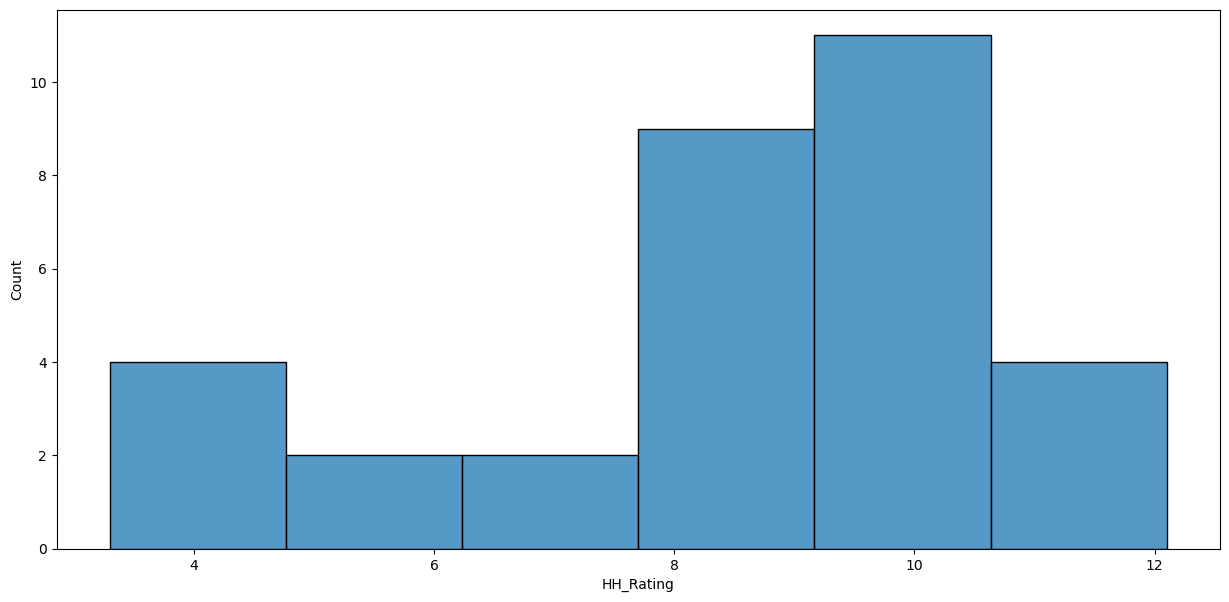

In [42]:
#HH_Rating Histogram
plt.figure(figsize=(15,7))
sns.histplot(x='HH_Rating',data=data)
plt.show()

**Histograms**: Show the distribution of the data. Does that data have normal distribution for any of its variables? The short answer is now. All the data is skewd.

/var/folders/xn/flzj9nh10rn23jrk_xt8vpb40000gn/T/ipykernel_4846/3459035273.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


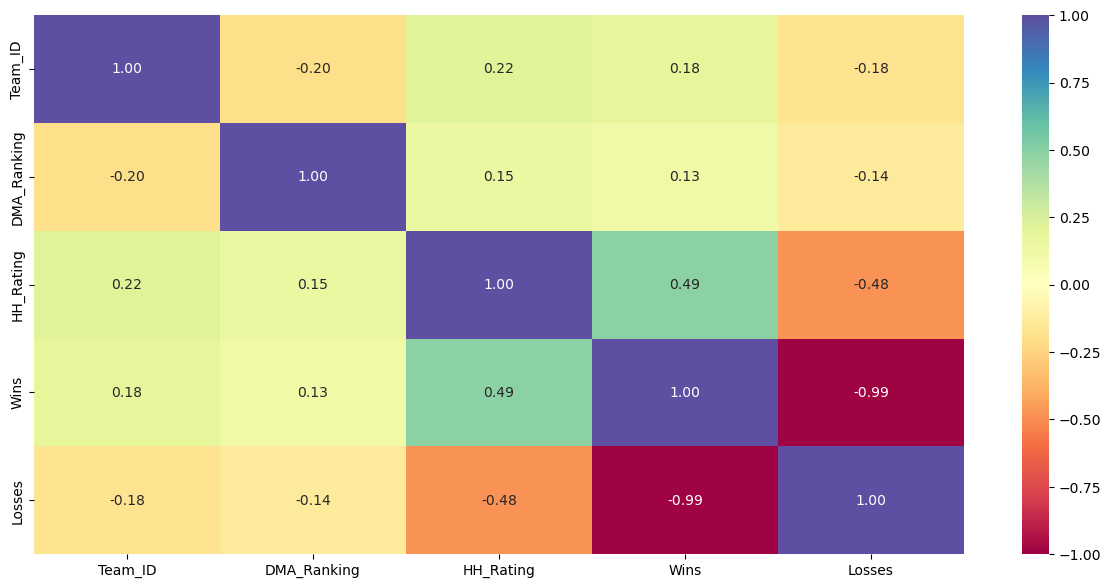

In [50]:
#Correlation Matrix of TV Viewership
corr_matrix = data.corr()

plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot
plt.show()

**Correlation Matrix**: Wins and HH_Rating and HH_Rating and Team_ID have the strongest correlations. While Wins and Losses have the the weakest correlations.

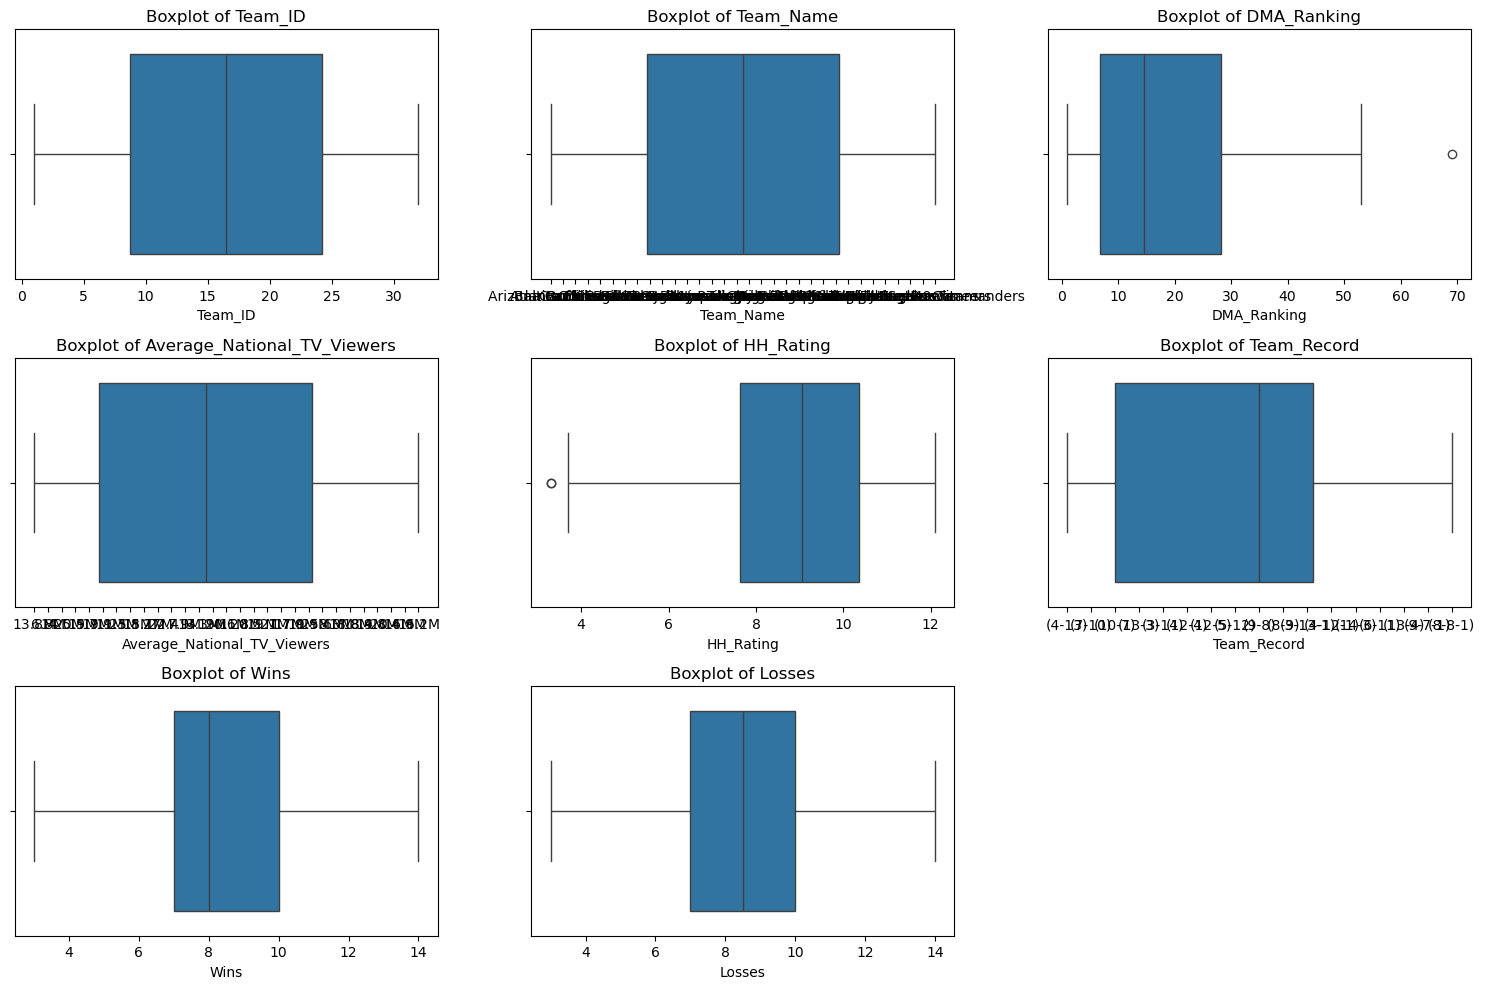

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plots
plt.figure(figsize=(15, 10))

# Loop through each variable in the data_model DataFrame to create a boxplot
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)  # Create a subplot for each variable
    sns.boxplot(data=data, x=column)  # Create a boxplot
    plt.title(f'Boxplot of {column}')  # Set the title for each subplot
    plt.xlabel(column)  # Set the x-axis label

plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plots

**Boxplots**: Show the distribution,variability, and if there are any outliers in the data. Most of the boxplots show variability. The boxplots for HH_Rating and DMA_Ranking have outliers.

**Data Engineering Method 2**: Data Cleaning/Dropping Columns

In [54]:
data.drop(columns=['Team_Record'], inplace=True)

In [57]:
data.drop(columns=['Wins', 'Losses'], inplace=True)

In [58]:
data.head()

,Team_ID,Team_Name,DMA_Ranking,Average_National_TV_Viewers,HH_Rating
0,1,Arizona Cardinals,11,13.8M,6.9
1,2,Atlanta Falcons,7,6.8M,3.3
2,3,Baltimore Ravens,28,14.5M,7.8
3,4,Buffalo Bills,53,20.9M,9.7
4,5,Carolina Panthers,22,6.8M,3.3


In [63]:
# Assuming the columns are 'team' and 'viewership', adjust based on your actual column names
# Group by 'team' and sum the viewership for each team
team_viewership = data.groupby('Team_Name')['Average_National_TV_Viewers'].sum().reset_index()

# Sort the teams by total viewership in descending order
team_viewership = team_viewership.sort_values(by='Average_National_TV_Viewers', ascending=False)

# Display the team with the highest viewership
most_watched_team = team_viewership.iloc[0]
print("Most watched team:")
print(most_watched_team)

Most watched team:
Team_Name                      New York Jets
Average_National_TV_Viewers             8.3M
Name: 24, dtype: object


--------------------------------
## **Conclusion** 
-------------------------------

According to the Average National TV Viewers of 2022, the most watched team was the New York Jets. 
The New York Jets had an average of 8.3 million TV Viewers nationally.

# **Appendix**

1. Nielsen Website: used it to pull TV viewership for Super Bowl.
The "Super Bowl LVIII Draws 123.7 Million Average Viewers, Largest TV Audience on Record" Article publised on February 2024.Used 
Nielsen TV Audience: https://www.nielsen.com/news-center/2024/super-bowl-lviii-draws-123-7-million-average-viewers-largest-tv-audience-on-record/

2. Google Website: used to define and describe how Nielsen Ratings are calculated.
Google Search: https://www.google.com/search?q=what+does+the+hhld+rating+for+nielsen+rating&oq=what+does+the+hhld+rating+for+nielsen+rating&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigATIHCAIQIRigATIHCAMQIRigATIHCAQQIRigAdIBCTE3NDIzajBqN6gCALACAA&sourceid=chrome&ie=UTF-8

3. Forbes Website: used it to explain how the Nielsen Ratings are calculated.
The "What Are Nielsen Ratings And How Are They Calculated?" Article published on December 18,2015.
Forbes Nielsen Ratings: https://www.forbes.com/sites/seamuskirst/2015/12/18/what-are-nielsen-ratings-and-how-are-they-calculated/

4. Pandas Website: Python Code Documentation
Common place Python documentation for coding.
Pandas: https://pandas.pydata.org/docs/reference/plotting.html

5. Sportico Website: Average National NFL TV Ratings 2022
Nielsen Ratings of Most Watched Teams published on Janurary 13,2023
Website:https://www.sportico.com/business/media/2023/nfl-tv-ratings-report-cbs-fox-nbc-1234701217/


# **Bonus:** Convert the Roman Numerals to Intergers

In [81]:
!pip install roman

In [36]:
import roman

In [ ]:
s = input()

def roman_to_integer(s):
    d ={'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
    ans = 0
    
    for i in range(len(s)):
        if i + 1 != len(s) and d[s[i]]<d[s[i+1]]:
            ans = ans - d[s[i]]
        else:
            ans = ans + d[s[i]]
    return ans
    print(roman_to_integer(s))

**Data Engineering Method 3**: Converting Roman Numerals to Integers